# MLP
Mean RCI over 14 cell lines.

This notebook uses
lncRNA, all transcripts, no middle-exclusion train, no middle-exclusion test, -1 threshold, learning module, cross-validation.

In [1]:
SEED = 44
import tensorflow as tf
tf.random.set_seed(SEED) 
tf.keras.backend.set_floatx('float32')
import numpy as np
np.random.seed(SEED) 
from datetime import datetime
print(datetime.now())

2023-05-01 18:52:24.484716


In [2]:
import sys
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/TrainTest_ver43/'  # must end in "/"
    MODEL_DIR=PATH+'My Drive/data/Localization/Models/'  # must end in "/"
    sys.path.append('/content/drive/My Drive/Colab Notebooks')
except:
    IN_COLAB = False
    DATA_DIR="/"
    MODEL_DIR="/"
print(DATA_DIR)
SAVE_MODEL_FILENAME = None # 'MLP_NoNo'
SAVE_DESCRIM_FILENAME = None # 'GMM_NoNo'
LOAD_MODEL_FILENAME = None # 'MLP.0.0.model'
LOAD_DESCRIM_FILENAME = None # 'GMM.0.0.pickle'

GPU device not found
Running on CoLab
Mounted at /content/drive/
/content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/


In [3]:
from platform import python_version
print('Python',python_version())
import pandas as pd
import scipy.stats as ss
import pickle
import time # sleep function
from os.path import isfile
from matplotlib import pyplot as plt 
import sklearn   # pip install --upgrade scikit-learn
print('sklearn',sklearn.__version__)

from learning import DataLoader, CrossValidator, Separator, ModelBuilder

K=5
ALPHABET=4**K + 1
EPOCHS=300 
EMBED_DIMEN = 4 # arbitrary hyperparameter
RCI_THRESHOLD_MECHANISM = 'ZERO'   # 'RCI_GMM' 'ZERO' 'THE_MEAN'
RCI_THRESHOLD_VALUE = -1  # use -1 for lncRNA, use 0 for mRNA
BREAK = False   # optionally break after first fold
FILTER_TRAIN        = False
FILTER_TAILS_TRAIN  = False
FILTER_MIDDLE_TRAIN = False
FILTER_TEST         = False
FILTER_TAILS_TEST   = False
FILTER_MIDDLE_TEST  = False
MIDDLE_LOW          = -2   # -2 for lncRNA, -1 for mRNA
MIDDLE_HIGH         = 0    #  0 for lncRNA, +1 for mRNA

REPEATS = 2
FOLDS = 5

Python 3.10.11
sklearn 1.2.2


In [4]:
RCI_FILE_TRAIN = 'train.lncRNA_RCI.all_cell_lines.csv'
RCI_FILE_TEST  = None # 'test.lncRNA_RCI.all_cell_lines.csv'

SEQ_FILE_TRAIN = 'train.all_lncRNA_transcripts.csv'
SEQ_FILE_TEST  = None # 'test.all_lncRNA_transcripts.csv'

In [5]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080',\
      'HUVEC','MCF.7','NCI.H460','NHEK','SK.MEL.5',\
      'SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()
EXCLUSIONS = [1]  # H1.hESC   
print('Exclusions',EXCLUSIONS)

Exclusions [1]


In [6]:
from tensorflow import keras
from keras import models
import pickle

def save_model(model, discriminator, filename1, filename2):
    filepath = MODEL_DIR + filename1
    model.save(filepath)
    print('Saved model 1 to',filepath)
    filepath = MODEL_DIR + filename2
    pickle.dump(discriminator, open(filepath, 'wb'))
    print('Saved model 2 to',filepath)

def load_model(filename1, filename2):
    filepath = MODEL_DIR + filename1
    model = keras.models.load_model(filepath)
    print('Loaded model 1 from',filepath)
    filepath = MODEL_DIR + filename2
    discriminator = pickle.load(open(filepath, 'rb'))        
    print('Loaded model 2 from',filepath)
    return model, discriminator
        

2023-05-01 18:52:47.533363
Load RCI from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.lncRNA_RCI.all_cell_lines.csv
Number of RCI values loaded 4372
Num RCI: 4372
Load sequence from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.all_lncRNA_transcripts.csv
Loaded 20943 sequences.

Training # 1 1
2023-05-01 18:53:19.833990
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.1.validation_genes.txt
Discriminator ZERO -1
Train 1:0 10048:7157 58.40%
Computed class weights: {0: 1.201970099203577, 1: 0.856140525477707}
Valid 1:0 2185:1553 58.45%
FIT


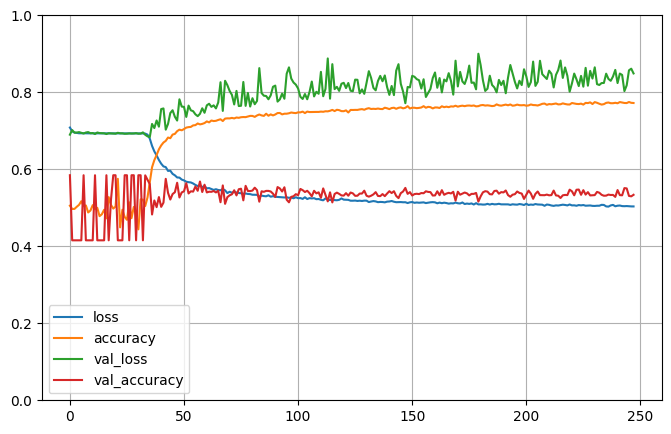


Testing # 1 1
2023-05-01 19:04:44.594111
PREDICT
Test 1:0 2185:1553 58.45%
Predict 1:0 2473:1265 66.16%
Test sizes (3738, 1025) (3738,)
Distrib of scores: 0.5812509 mean 0.2341541 std
Range of scores: 0.059635587 to 0.86413765
Score threshold 0.5
Confusion matrix
 [[ 571  982]
 [ 694 1491]]
Normalized matrix
 [[0.15275548 0.26270733]
 [0.18566078 0.3988764 ]]
Extreme scores correct, pos:neg 1116 358
Extreme scores incorrect pos:neg 673 349


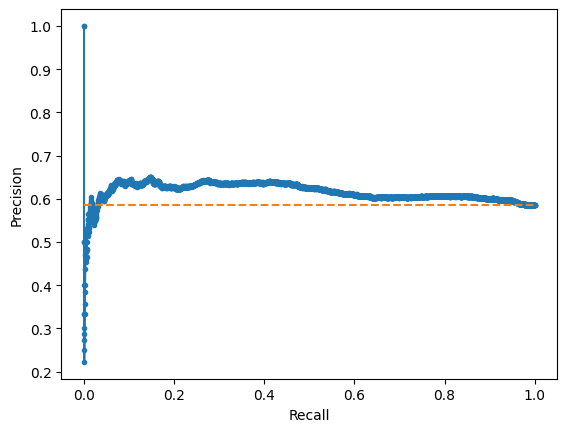

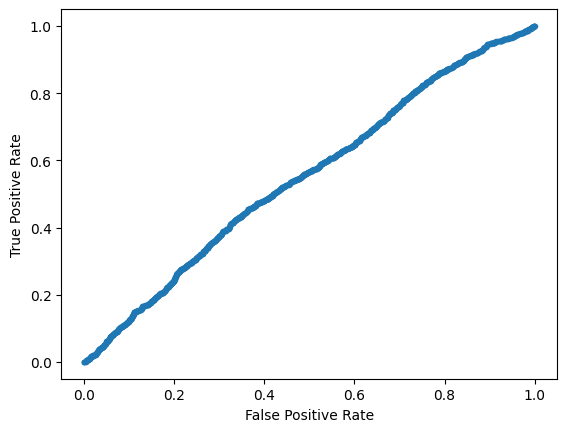

Accuracy: 55.16% Precision: 60.29% Recall: 68.24%
F1: 64.02% MCC: 0.0521
AUPRC: 61.59% AUROC: 55.14%
 accuracy [55.16318887105404]
 precision [60.29114435907804]
 recall [68.23798627002289]
 F1 [64.01889222842422]
 MCC [0.052132007908905285]
 AUPRC [61.59191868236014]
 AUROC [55.138751158531285]

Training # 1 2
2023-05-01 19:04:45.916257
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.2.validation_genes.txt
Discriminator ZERO -1
Train 1:0 9502:6343 59.97%
Computed class weights: {0: 1.2490146618319407, 1: 0.8337718375078931}
Valid 1:0 2731:2367 53.57%
FIT


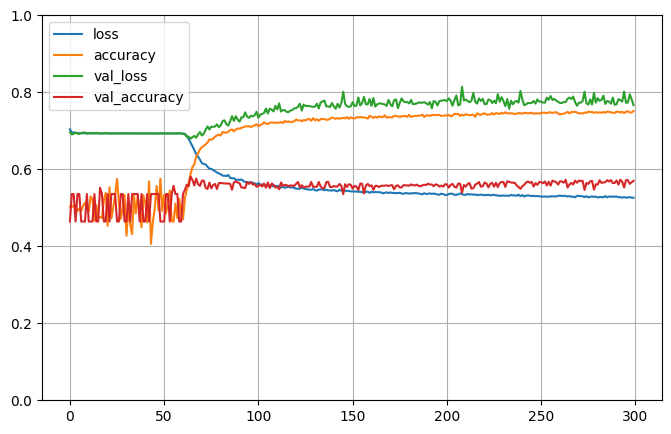


Testing # 1 2
2023-05-01 19:18:10.958320
PREDICT
Test 1:0 2731:2367 53.57%
Predict 1:0 2699:2399 52.94%
Test sizes (5098, 1025) (5098,)
Distrib of scores: 0.5381538 mean 0.24865988 std
Range of scores: 0.09945219 to 0.85461104
Score threshold 0.5
Confusion matrix
 [[1287 1080]
 [1112 1619]]
Normalized matrix
 [[0.25245194 0.21184778]
 [0.21812475 0.31757552]]
Extreme scores correct, pos:neg 1232 852
Extreme scores incorrect pos:neg 792 679


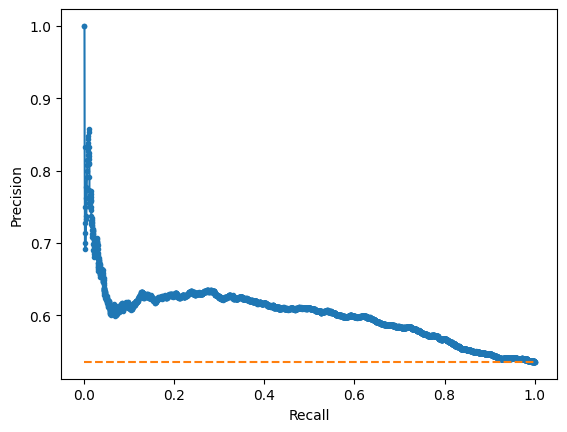

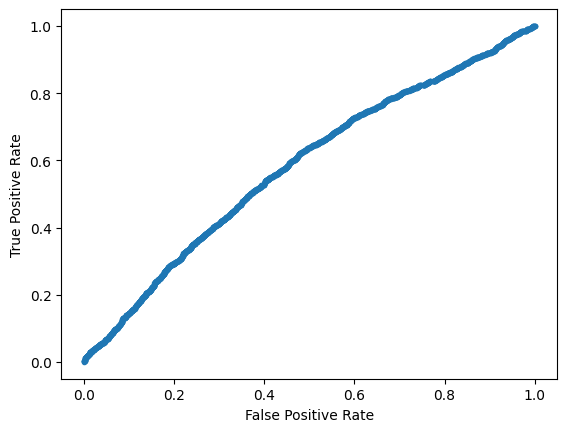

Accuracy: 57.00% Precision: 59.99% Recall: 59.28%
F1: 59.63% MCC: 0.1364
AUPRC: 60.16% AUROC: 58.20%
 accuracy [57.002746174970575]
 precision [59.98517969618378]
 recall [59.28231417063346]
 F1 [59.631675874769805]
 MCC [0.13643730653340547]
 AUPRC [60.15790003222974]
 AUROC [58.20049945260699]

Training # 1 3
2023-05-01 19:18:12.525933
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.3.validation_genes.txt
Discriminator ZERO -1
Train 1:0 9917:6983 58.68%
Computed class weights: {0: 1.2100816268079622, 1: 0.8520721992538066}
Valid 1:0 2316:1727 57.28%
FIT


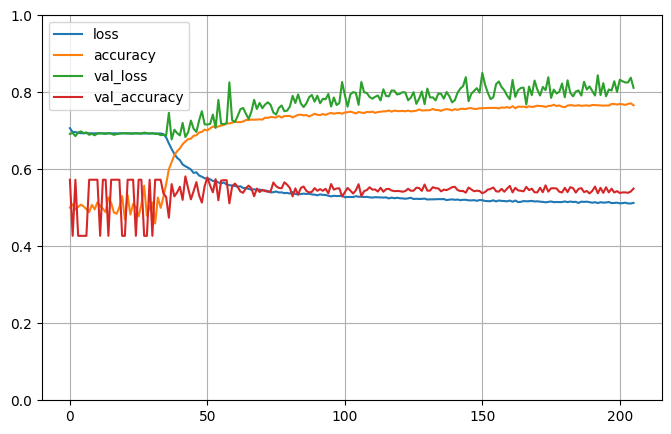


Testing # 1 3
2023-05-01 19:27:23.454194
PREDICT
Test 1:0 2316:1727 57.28%
Predict 1:0 3012:1031 74.50%
Test sizes (4043, 1025) (4043,)
Distrib of scores: 0.6194875 mean 0.21244816 std
Range of scores: 0.0010589296 to 0.9125958
Score threshold 0.5
Confusion matrix
 [[ 492 1235]
 [ 539 1777]]
Normalized matrix
 [[0.12169181 0.30546624]
 [0.13331684 0.43952511]]
Extreme scores correct, pos:neg 1342 275
Extreme scores incorrect pos:neg 887 269


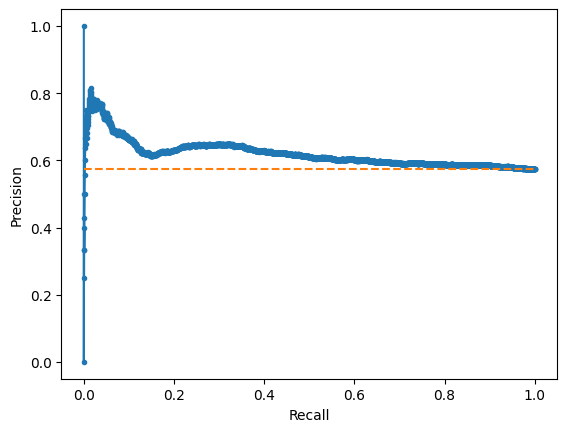

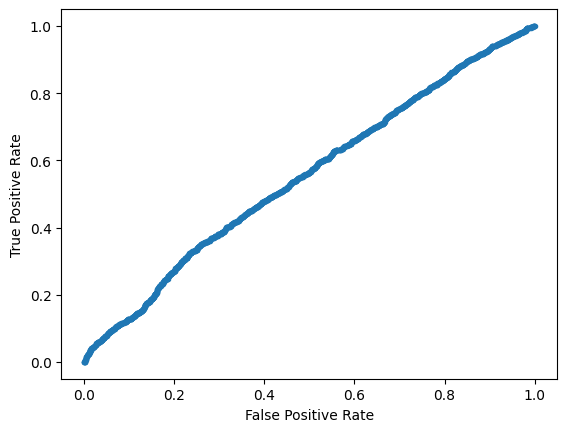

Accuracy: 56.12% Precision: 59.00% Recall: 76.73%
F1: 66.70% MCC: 0.0592
AUPRC: 61.97% AUROC: 55.26%
 accuracy [56.121691813010145]
 precision [58.997343957503325]
 recall [76.72711571675302]
 F1 [66.7042042042042]
 MCC [0.05919453271915333]
 AUPRC [61.9736086209429]
 AUROC [55.26197755249602]

Training # 1 4
2023-05-01 19:27:24.333438
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.4.validation_genes.txt
Discriminator ZERO -1
Train 1:0 9895:7159 58.02%
Computed class weights: {0: 1.191088140801788, 1: 0.8617483577564427}
Valid 1:0 2338:1551 60.12%
FIT


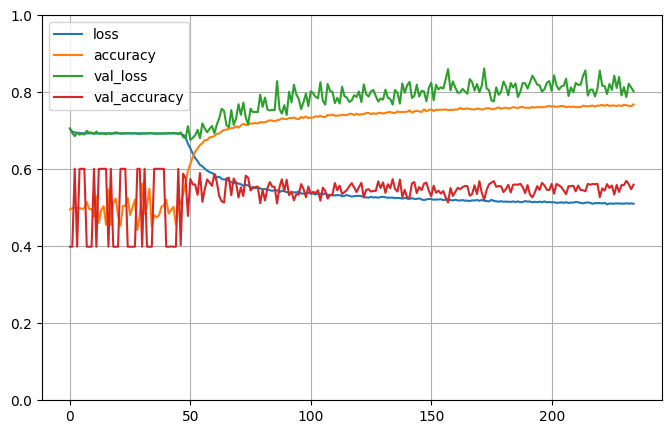


Testing # 1 4
2023-05-01 19:37:48.294543
PREDICT
Test 1:0 2338:1551 60.12%
Predict 1:0 2825:1064 72.64%
Test sizes (3889, 1025) (3889,)
Distrib of scores: 0.6229195 mean 0.2296618 std
Range of scores: 0.06281397 to 0.9531676
Score threshold 0.5
Confusion matrix
 [[ 480 1071]
 [ 584 1754]]
Normalized matrix
 [[0.12342504 0.27539213]
 [0.15016714 0.45101569]]
Extreme scores correct, pos:neg 1359 288
Extreme scores incorrect pos:neg 786 311


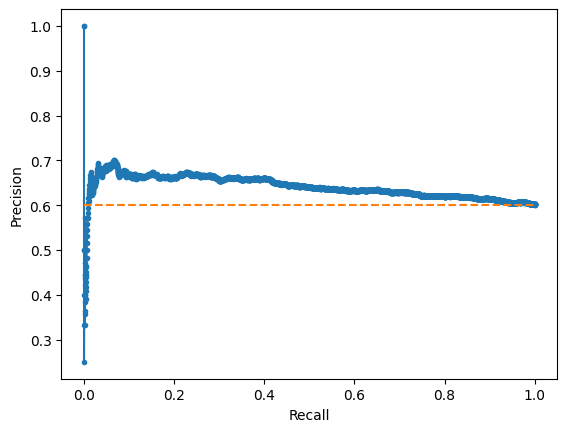

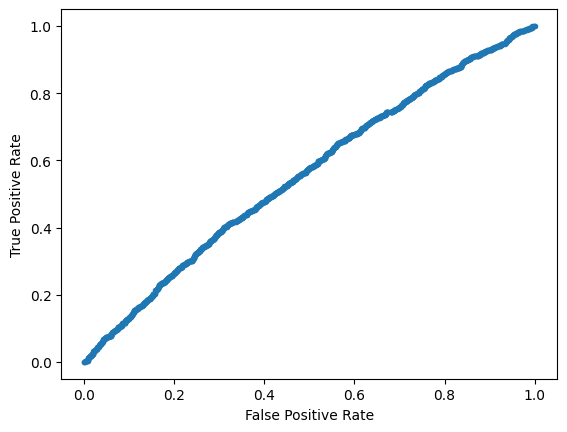

Accuracy: 57.44% Precision: 62.09% Recall: 75.02%
F1: 67.94% MCC: 0.0656
AUPRC: 64.07% AUROC: 55.66%
 accuracy [57.44407302648496]
 precision [62.08849557522124]
 recall [75.0213857998289]
 F1 [67.94499322099553]
 MCC [0.06556339532721552]
 AUPRC [64.07166699342173]
 AUROC [55.65566849169856]

Training # 1 5
2023-05-01 19:37:49.239939
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.5.validation_genes.txt
Discriminator ZERO -1
Train 1:0 9570:7198 57.07%
Computed class weights: {0: 1.1647679911086413, 1: 0.8760710553814002}
Valid 1:0 2663:1512 63.78%
FIT


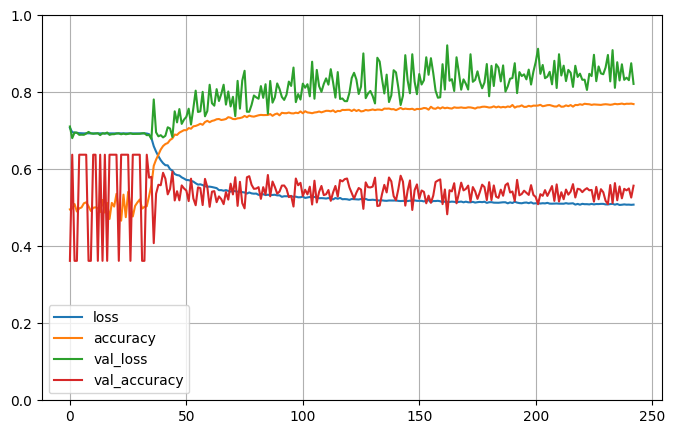


Testing # 1 5
2023-05-01 19:47:58.542735
PREDICT
Test 1:0 2663:1512 63.78%
Predict 1:0 3125:1050 74.85%
Test sizes (4175, 1025) (4175,)
Distrib of scores: 0.6241045 mean 0.21361655 std
Range of scores: 0.0051031266 to 0.8546159
Score threshold 0.5
Confusion matrix
 [[ 411 1101]
 [ 639 2024]]
Normalized matrix
 [[0.09844311 0.26371257]
 [0.15305389 0.48479042]]
Extreme scores correct, pos:neg 1554 233
Extreme scores incorrect pos:neg 823 341


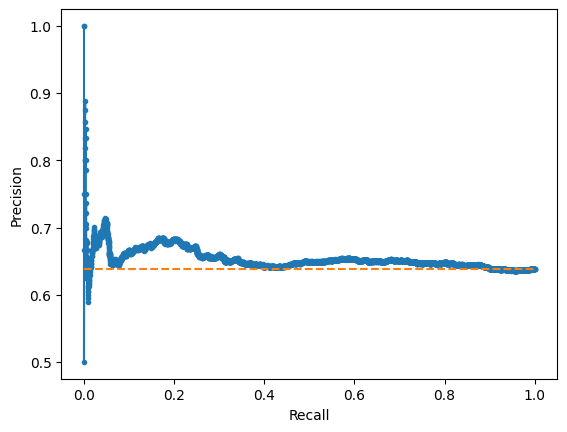

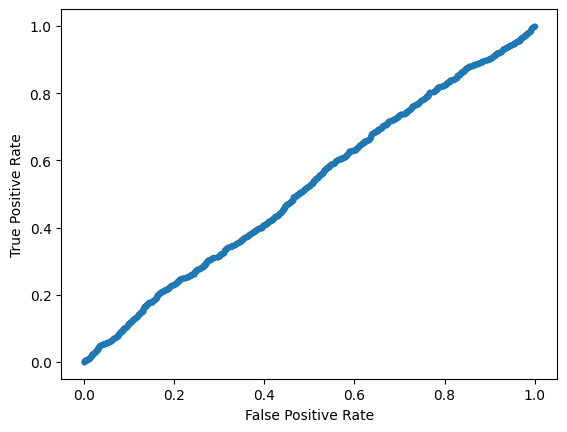

Accuracy: 58.32% Precision: 64.77% Recall: 76.00%
F1: 69.94% MCC: 0.0353
AUPRC: 65.37% AUROC: 52.04%
 accuracy [58.32335329341317]
 precision [64.768]
 recall [76.00450619601953]
 F1 [69.93780234968902]
 MCC [0.03530450557475165]
 AUPRC [65.36784693527794]
 AUROC [52.03951067638638]

Training # 2 1
2023-05-01 19:47:59.435004
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.1.validation_genes.txt
Discriminator ZERO -1
Train 1:0 9889:6553 60.14%
Computed class weights: {0: 1.2545399053868458, 1: 0.8313277378905854}
Valid 1:0 2344:2157 52.08%
FIT


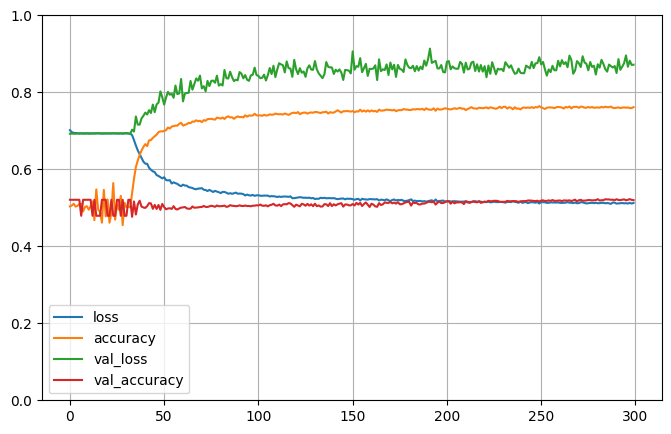


Testing # 2 1
2023-05-01 20:01:05.320926
PREDICT
Test 1:0 2344:2157 52.08%
Predict 1:0 2033:2468 45.17%
Test sizes (4501, 1025) (4501,)
Distrib of scores: 0.47038588 mean 0.27307397 std
Range of scores: 0.08251316 to 0.85527474
Score threshold 0.5
Confusion matrix
 [[1232  925]
 [1236 1108]]
Normalized matrix
 [[0.27371695 0.20550989]
 [0.27460564 0.24616752]]
Extreme scores correct, pos:neg 834 879
Extreme scores incorrect pos:neg 633 872


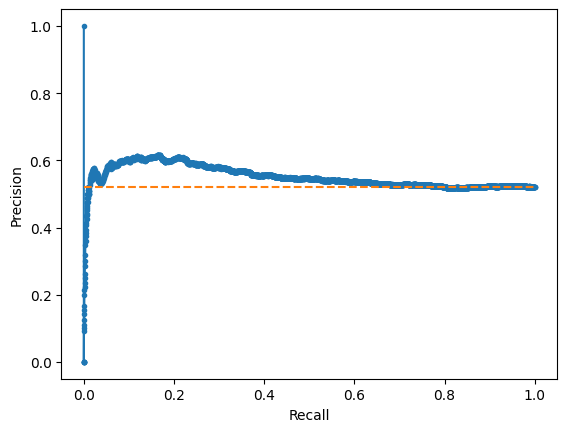

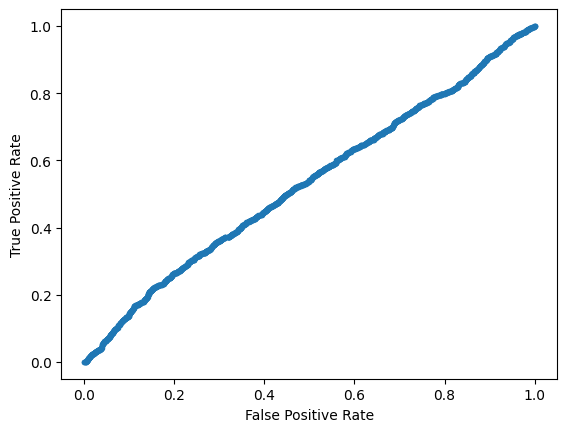

Accuracy: 51.99% Precision: 54.50% Recall: 47.27%
F1: 50.63% MCC: 0.0440
AUPRC: 55.04% AUROC: 53.09%
 accuracy [51.988447011775165]
 precision [54.50073782587309]
 recall [47.269624573378834]
 F1 [50.62828421293124]
 MCC [0.04402812958578263]
 AUPRC [55.03690832476615]
 AUROC [53.085398599052844]

Training # 2 2
2023-05-01 20:01:06.200890
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.2.validation_genes.txt
Discriminator ZERO -1
Train 1:0 9917:7231 57.83%
Computed class weights: {0: 1.1857281150601577, 1: 0.8645759806393063}
Valid 1:0 2316:1479 61.03%
FIT


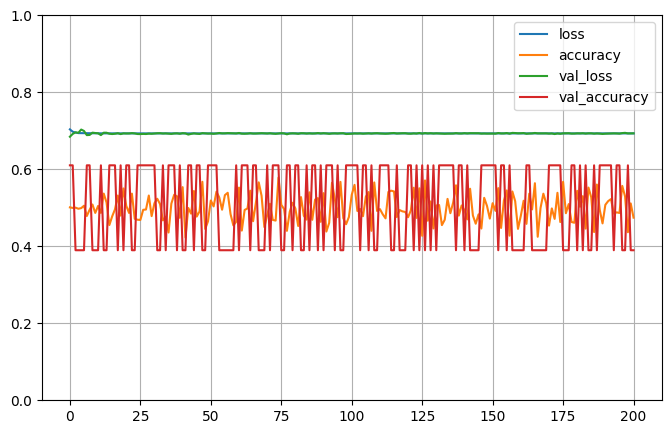


Testing # 2 2
2023-05-01 20:10:30.275008
PREDICT
Test 1:0 2316:1479 61.03%
Predict 1:0 3795:0 100.00%
Test sizes (3795, 1025) (3795,)
Distrib of scores: 0.50180405 mean 3.8422893e-08 std
Range of scores: 0.501804 to 0.5018042
Score threshold 0.5
Confusion matrix
 [[   0 1479]
 [   0 2316]]
Normalized matrix
 [[0.         0.38972332]
 [0.         0.61027668]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


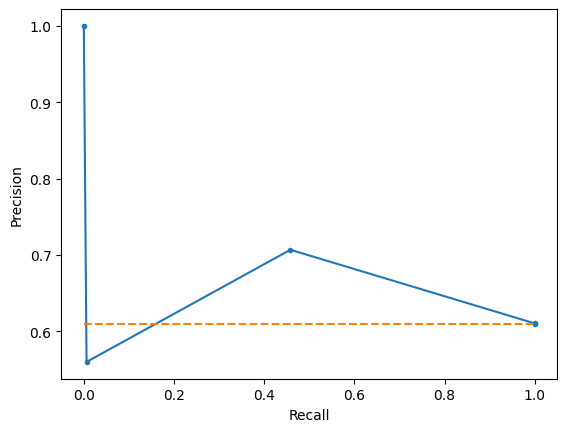

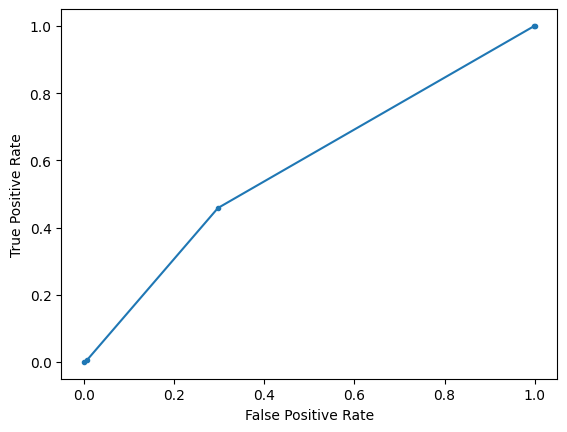

Accuracy: 61.03% Precision: 61.03% Recall: 100.00%
F1: 75.80% MCC: 0.0000
AUPRC: 64.80% AUROC: 57.97%
 accuracy [61.027667984189726]
 precision [61.027667984189726]
 recall [100.0]
 F1 [75.79774177712322]
 MCC [0.0]
 AUPRC [64.7982651012756]
 AUROC [57.96883192559973]

Training # 2 3
2023-05-01 20:10:31.456563
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.3.validation_genes.txt
Discriminator ZERO -1
Train 1:0 9841:7425 57.00%
Computed class weights: {0: 1.1626936026936028, 1: 0.8772482471293568}
Valid 1:0 2392:1285 65.05%
FIT


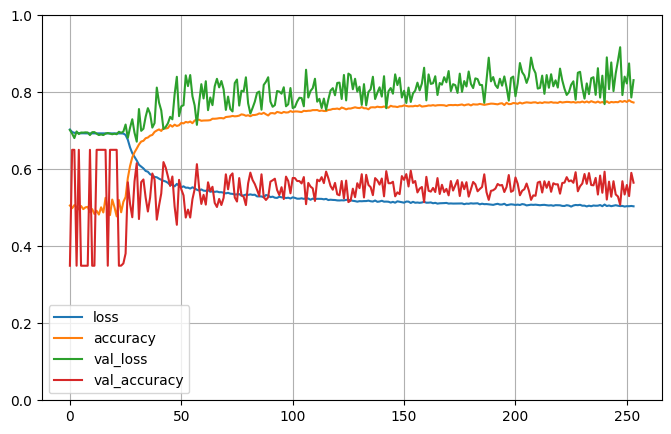


Testing # 2 3
2023-05-01 20:22:40.336394
PREDICT
Test 1:0 2392:1285 65.05%
Predict 1:0 2629:1048 71.50%
Test sizes (3677, 1025) (3677,)
Distrib of scores: 0.61920446 mean 0.24957101 std
Range of scores: 0.06970837 to 0.8641972
Score threshold 0.5
Confusion matrix
 [[ 424  861]
 [ 624 1768]]
Normalized matrix
 [[0.1153114  0.23415828]
 [0.16970356 0.48082676]]
Extreme scores correct, pos:neg 1470 286
Extreme scores incorrect pos:neg 692 421


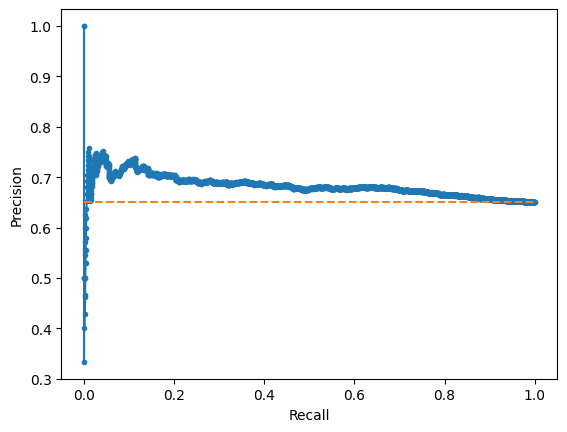

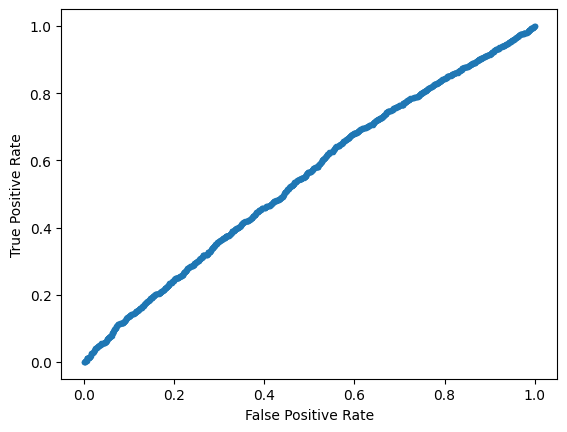

Accuracy: 59.61% Precision: 67.25% Recall: 73.91%
F1: 70.42% MCC: 0.0730
AUPRC: 68.22% AUROC: 54.58%
 accuracy [59.61381561055208]
 precision [67.24990490680868]
 recall [73.91304347826086]
 F1 [70.42421828321052]
 MCC [0.0729761573271883]
 AUPRC [68.21910431592939]
 AUROC [54.57777546425828]

Training # 2 4
2023-05-01 20:22:41.241591
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.4.validation_genes.txt
Discriminator ZERO -1
Train 1:0 10008:6834 59.42%
Computed class weights: {0: 1.2322212467076383, 1: 0.8414268585131894}
Valid 1:0 2225:1876 54.26%
FIT


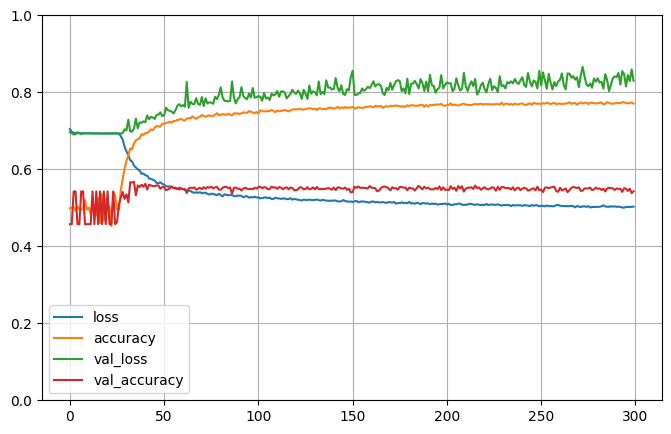


Testing # 2 4
2023-05-01 20:38:05.380254
PREDICT
Test 1:0 2225:1876 54.26%
Predict 1:0 2182:1919 53.21%
Test sizes (4101, 1025) (4101,)
Distrib of scores: 0.51823026 mean 0.2733022 std
Range of scores: 0.0962791 to 0.84631246
Score threshold 0.5
Confusion matrix
 [[ 960  916]
 [ 959 1266]]
Normalized matrix
 [[0.23408925 0.22336016]
 [0.2338454  0.30870519]]
Extreme scores correct, pos:neg 1041 702
Extreme scores incorrect pos:neg 718 673


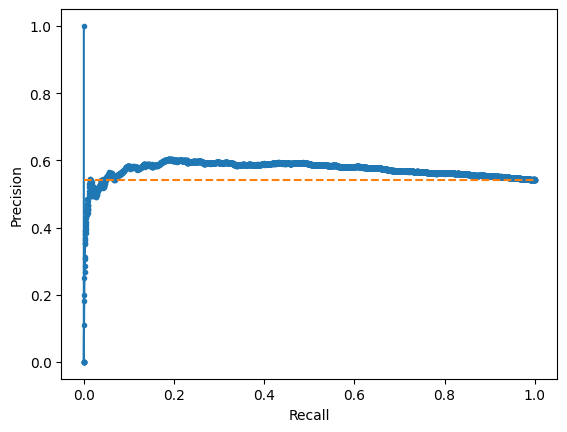

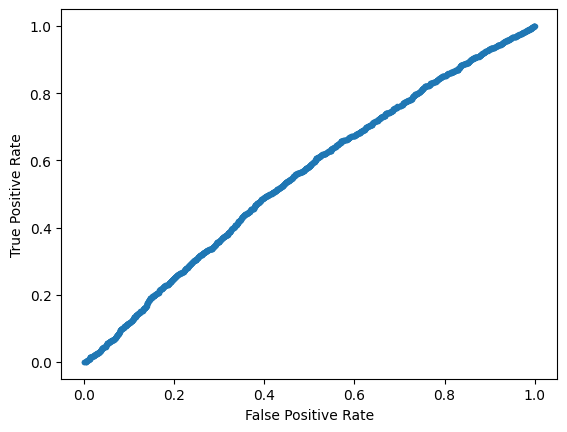

Accuracy: 54.28% Precision: 58.02% Recall: 56.90%
F1: 57.45% MCC: 0.0806
AUPRC: 57.19% AUROC: 55.17%
 accuracy [54.2794440380395]
 precision [58.020164986251146]
 recall [56.89887640449438]
 F1 [57.45405037440435]
 MCC [0.08058892279825536]
 AUPRC [57.18874382924493]
 AUROC [55.17394168802856]

Training # 2 5
2023-05-01 20:38:06.326603
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.5.validation_genes.txt
Discriminator ZERO -1
Train 1:0 9277:6797 57.71%
Computed class weights: {0: 1.1824334265116963, 1: 0.8663361000323381}
Valid 1:0 2956:1913 60.71%
FIT


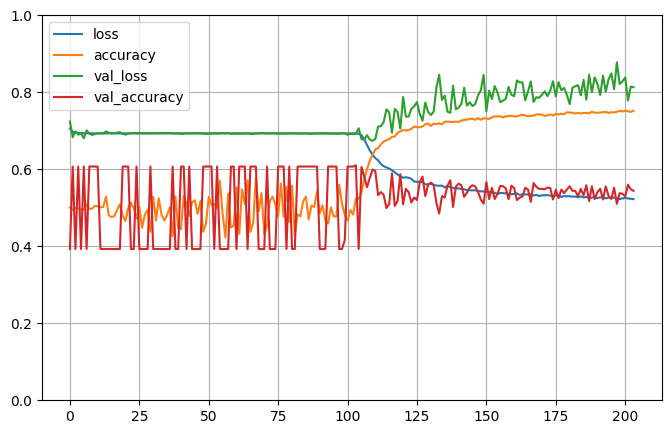


Testing # 2 5
2023-05-01 20:48:30.249492
PREDICT
Test 1:0 2956:1913 60.71%
Predict 1:0 4724:145 97.02%
Test sizes (4869, 1025) (4869,)
Distrib of scores: 0.5014709 mean 0.0007939702 std
Range of scores: 0.4987788 to 0.5050021
Score threshold 0.5
Confusion matrix
 [[  80 1833]
 [  65 2891]]
Normalized matrix
 [[0.01643048 0.37646334]
 [0.01334976 0.59375642]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


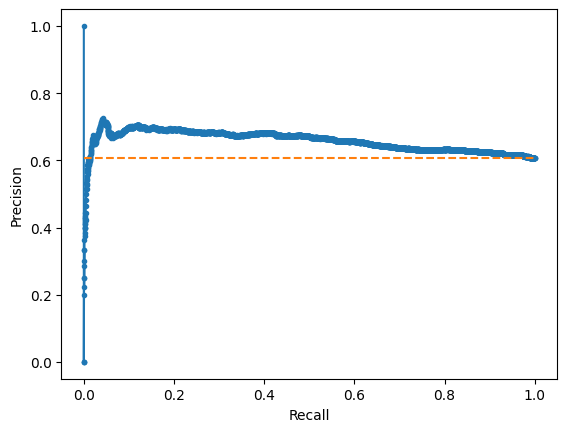

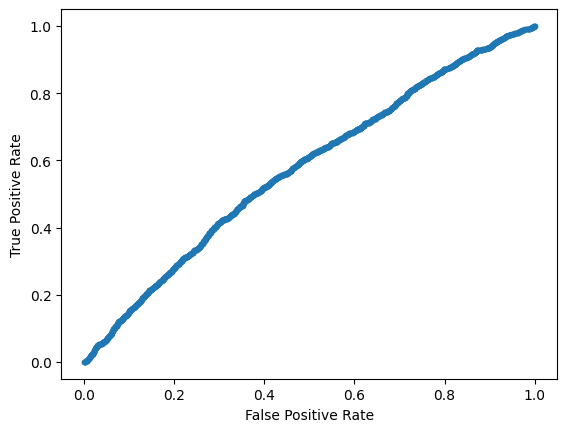

Accuracy: 61.02% Precision: 61.20% Recall: 97.80%
F1: 75.29% MCC: 0.0570
AUPRC: 65.76% AUROC: 57.42%
 accuracy [61.018689669336624]
 precision [61.198137171888234]
 recall [97.80108254397834]
 F1 [75.28645833333333]
 MCC [0.05697607682557962]
 AUPRC [65.76170671072684]
 AUROC [57.41682151959352]
2023-05-01 20:48:31.226569


In [7]:
print(datetime.now())

accuracy=[]
precision=[]
recall=[]
f1=[]
mcc=[]
auprc=[]
auroc=[]

loader = DataLoader(K,ALPHABET)
filepath = DATA_DIR+RCI_FILE_TRAIN
print("Load RCI from",filepath)
gene_to_rci = loader.load_gene_rci_values(filepath,EXCLUSIONS)
print('Num RCI:', len(gene_to_rci.keys()))
filepath = DATA_DIR+SEQ_FILE_TRAIN
print('Load sequence from',filepath)
allids,allseq = loader.load_spectra(filepath)  # for MLP (load_sequence() for CNN)
print('Loaded',len(allseq),'sequences.')
test_gene_to_rci = None
test_allids = None
test_allseq = None
if SEQ_FILE_TEST is not None:
    # Train on the entire train set (no cross-validation).
    # Evaluate with the test files.
    test_loader = DataLoader(K,ALPHABET)
    filepath = DATA_DIR+RCI_FILE_TEST
    print("Load RCI from",filepath)
    test_gene_to_rci = test_loader.load_gene_rci_values(filepath,EXCLUSIONS)
    print('Num RCI:', len(test_gene_to_rci.keys()))
    filepath = DATA_DIR+SEQ_FILE_TEST
    print('Load sequence from',filepath)
    test_allids,test_allseq = test_loader.load_spectra(filepath)
    print('Loaded',len(test_allseq),'sequences.')

for repeat in range(REPEATS):
    for fold in range(FOLDS):
        show_r = repeat+1  # display one-based counting
        show_f = fold+1    # display one-based counting

        print()
        print("Training #",show_r,show_f)
        print(datetime.now())
        builder = ModelBuilder(ALPHABET)
        cvdo = CrossValidator(EPOCHS,RCI_THRESHOLD_VALUE)
        cvdo.set_model_builder(builder)
        cvdo.set_threshold_mechanism(RCI_THRESHOLD_MECHANISM)
        
        if SEQ_FILE_TEST is None:
            # Train on 80% and evaluate on 20%.
            separator = Separator()
            separator.set_middle(FILTER_TEST,FILTER_TAILS_TEST,FILTER_MIDDLE_TEST,\
                                 FILTER_TRAIN,FILTER_TAILS_TRAIN,FILTER_MIDDLE_TRAIN,\
                                 MIDDLE_LOW,MIDDLE_HIGH)
            separator.load(DATA_DIR,show_r,show_f)
            separator.process(allids,allseq,gene_to_rci)
            train_allids,test_allids = separator.get_ids()
            train_allseq,test_allseq = separator.get_seq()
            train_gene_to_rci,test_gene_to_rci = separator.get_rci()
            cvdo.train_new_model(
                train_allids,train_allseq,train_gene_to_rci,
                test_allids,test_allseq,test_gene_to_rci)
            if SAVE_MODEL_FILENAME is not None:
                filename1 = f"{SAVE_MODEL_FILENAME}.{show_r}.{show_f}.model"
                filename2 = f"{SAVE_DESCRIM_FILENAME}.{show_r}.{show_f}.pickle"
                model,discrim = cvdo.get_models()
                save_model(model,discrim,filename1,filename2)
        else:
            # Train on the entire train set (no cross-validation).
            # Evaluate with the test files.
            train_allids = allids
            train_allseq = allseq
            train_gene_to_rci = gene_to_rci
            BREAK = True
            if LOAD_MODEL_FILENAME is not None:
                filename1 = LOAD_MODEL_FILENAME
                filename2 = LOAD_DESCRIM_FILENAME
                model, descrim = load_model(filename1, filename2)
                cvdo.set_models(model, descrim)
            else:
                cvdo.train_new_model(
                    train_allids,train_allseq,train_gene_to_rci,
                    None,None,None)

        print()
        print("Testing #",show_r,show_f)
        print(datetime.now())
        cvdo.reset_statistics()
        cvdo.test_without_training(
            test_allids,test_allseq,test_gene_to_rci)
        cv_accuracy,cv_precision,cv_recall,cv_f1,cv_mcc,cv_auprc,cv_auroc=\
            cvdo.get_statistics()

        print(" accuracy" ,  cv_accuracy)
        print(" precision" , cv_precision)
        print(" recall" ,    cv_recall)
        print(" F1" ,        cv_f1)
        print(" MCC" ,       cv_mcc)
        print(" AUPRC" ,     cv_auprc)
        print(" AUROC" ,     cv_auroc)

        accuracy.append(cv_accuracy)
        precision.append(cv_precision)
        recall.append(cv_recall)
        f1.append(cv_f1)
        mcc.append(cv_mcc)
        auprc.append(cv_auprc)
        auroc.append(cv_auroc)
        if BREAK: break
    if BREAK: break
print(datetime.now())

In [8]:
def STD (values):
    # ddof=1 reduces bias when extrapolating from sample to population
    return np.std(values,ddof=1)

print(" accuracy mean %.2f%% std %.2f" %  (np.mean(accuracy),  STD(accuracy)))
print(" precision mean %.2f%% std %.2f" % (np.mean(precision), STD(precision)))
print(" recall mean %.2f%% std %.2f" %    (np.mean(recall),    STD(recall)))
print(" F1 mean %.2f%% std %.2f" %        (np.mean(f1),        STD(f1)))
print(" MCC mean %.4f std %.4f" %       (np.mean(mcc),       STD(mcc)))
print(" AUPRC mean %.2f%% std %.2f" %     (np.mean(auprc),     STD(auprc)))
print(" AUROC mean %.2f%% std %.2f" %     (np.mean(auroc),     STD(auroc)))

print(" accuracy"  , accuracy)
print(" precision" , precision)
print(" recall"    , recall)
print(" F1"        , f1)
print(" MCC"       , mcc)
print(" AUPRC"     , auprc)
print(" AUROC"     , auroc)



 accuracy mean 57.20% std 2.93
 precision mean 60.81% std 3.51
 recall mean 73.12% std 16.68
 F1 mean 65.78% std 7.99
 MCC mean 0.0603 std 0.0350
 AUPRC mean 62.42% std 4.08
 AUROC mean 55.45% std 2.00
 accuracy [[55.16318887105404], [57.002746174970575], [56.121691813010145], [57.44407302648496], [58.32335329341317], [51.988447011775165], [61.027667984189726], [59.61381561055208], [54.2794440380395], [61.018689669336624]]
 precision [[60.29114435907804], [59.98517969618378], [58.997343957503325], [62.08849557522124], [64.768], [54.50073782587309], [61.027667984189726], [67.24990490680868], [58.020164986251146], [61.198137171888234]]
 recall [[68.23798627002289], [59.28231417063346], [76.72711571675302], [75.0213857998289], [76.00450619601953], [47.269624573378834], [100.0], [73.91304347826086], [56.89887640449438], [97.80108254397834]]
 F1 [[64.01889222842422], [59.631675874769805], [66.7042042042042], [67.94499322099553], [69.93780234968902], [50.62828421293124], [75.79774177712322],